In [1]:
import dmrghandler.energy_extrapolation as ee
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp_stats
from pathlib import Path

In [2]:
# fcidump_file = "fcidump.0_ru_macho_{'Ru'_ 'cc-pVTZ-PP', 'default'_ '6-311++G__'}" 
# fcidump_file = "fcidump.1_ru_macho_{'Ru'_ 'cc-pVTZ-PP', 'default'_ '6-311++G__'}"
# fcidump_file = "fcidump.2_co2_6-311++G__"
# fcidump_file = "fcidump.3_ts_ru_macho_co2_{'Ru'_ 'cc-pVTZ-PP', 'default'_ '6-311++G__'}"
# fcidump_file = "fcidump.5_ts_ru_macho_melact_{'Ru'_ 'cc-pVTZ-PP', 'default'_ '6-311++G__'}"
# fcidump_file = "fcidump.7_melact_6-311++G__"
# fcidump_file = "fcidump.8_melact_6-311++G__"
# fcidump_file = "fcidump.9_mo_n2-_{'Mo'_ 'def2-TZVP', 'default'_ 'def2-SVP'}" # Recorded,  point index 3
# fcidump_file = "fcidump.10_fecp2+_s0.5_def2-tzvp" # Lower quality, best at point index 4 
# fcidump_file = "fcidump.10_fecp2+_s0.5_def2-tzvp_mkl_change"
# fcidump_file = "fcidump.10_fecp2+_s0.5_def2-tzvp_rerun"
fcidump_file = "fcidump.11_fecp2_s0_def2-tzvp" # All neg slope???
# fcidump_file = "fcidump.12_mo_n2_{'Mo'_ 'def2-TZVP', 'default'_ 'def2-SVP'}" # Recorded,  point index 10
    # "fcidump.16_ts_1over4a_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p", 
    # "fcidump.18_I_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)'}", 
# fcidump_file = "fcidump.20_rc_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)'}" # Recorded,  point index 3, poor quality, BD fit threshold set to 0.03
# fcidump_file = "fcidump.21_rc_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)'}" # Recorded,  point index 2
# fcidump_file = "fcidump.22_pc-_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)'}"
# fcidump_file = "fcidump.24_ts_1over2_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)" # Removed first run data, Recorded,  point index 4,BD fit threshold set to 0.02
# fcidump_file = "fcidump.25_ts_1over2_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)" # Recorded,  point index 2
# fcidump_file = "fcidump.26_pc_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)'}" # Recorded,  point index 1
# fcidump_file = "fcidump.27_pc_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)'}"  # Recorded,  point index 6
# fcidump_file = "fcidump.28_2_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)'}"  # Recorded,  point index 4
# fcidump_file = "fcidump.29_2_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)'}"  # Recorded,  point index 4
# fcidump_file = "fcidump.30_4a_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)'}" # Recorded,  point index 2, BD fit threshold set to 0.02
# fcidump_file = "fcidump.31_4a_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)'}"  # Recorded,  point index 7
# fcidump_file = "fcidump.32_2ru_III_3pl_{'default' _ '6-31+G(d,p)', 'Ru' _ 'lanl2tz' }"
# fcidump_file = "fcidump.33_2ru_III_3pl_{'default' _ '6-31+G(d,p)', 'Ru' _ 'lanl2tz' }"
# fcidump_file = "fcidump.34_3ruo_IV_2pl_{'Ru' _ 'lanl2tz', 'default' _ '6-31+G(d,p)'}"
# fcidump_file = "fcidump.35_3ruo_IV_2pl_{'Ru' _ 'lanl2tz', 'default' _ '6-31+G(d,p)'}"
# fcidump_file = "fcidump.36_1ru_II_2pl_{'default' _ '6-31+G(d,p)', 'Ru' _ 'lanl2tz' }"
# fcidump_file = "fcidump.37_1ru_II_2pl_{'default' _ '6-31+G(d,p)', 'Ru' _ 'lanl2tz' }"
# fcidump_file = "fcidump.38_1_ts_{'default' _ 'cc-pVTZ', 'Ru' _ 'LANL2TZ'}"
# fcidump_file = "fcidump.39_1_ts_{'default' _ 'cc-pVTZ', 'Ru' _ 'LANL2TZ'}"
# fcidump_file = "fcidump.40_1_ts_{'default' _ 'cc-pVTZ', 'Ru' _ 'LANL2TZ'}"
# fcidump_file = "fcidump.41_1_ts_{'default' _ 'cc-pVTZ', 'Ru' _ 'LANL2TZ'}"
# fcidump_file = "fcidump.43_1_star_{'default' _ 'cc-pVTZ', 'Ru' _ 'LANL2TZ'}"
# fcidump_file = "fcidump.45_1_star_{'default' _ 'cc-pVTZ', 'Ru' _ 'LANL2TZ'}"
# fcidump_file = "fcidump.46_2_{'default' _ 'cc-pVTZ', 'Ru' _ 'LANL2TZ'}"
# fcidump_file = "fcidump.47_2_{'default' _ 'cc-pVTZ', 'Ru' _ 'LANL2TZ'}"
# fcidump_file = "fcidump.48_2_{'default' _ 'cc-pVTZ', 'Ru' _ 'LANL2TZ'}"
# fcidump_file = "fcidump.49_2_{'default' _ 'cc-pVTZ', 'Ru' _ 'LANL2TZ'}"
# fcidump_file = "fcidump.50_6acme_{'default' _ '6-31++G(d,p)'}"
# fcidump_file = "fcidump.51_6acme_{'default' _ '6-31++G(d,p)'}"
# fcidump_file = "fcidump.53_ts56_{'default' _ '6-31++G(d,p)'}"
# fcidump_file = "fcidump.54_ts56_{'default' _ '6-31++G(d,p)'}"
# fcidump_file = "fcidump.55_ts56_{'default' _ '6-31++G(d,p)'}"
# fcidump_file = "fcidump.56_5_{'default' _ '6-31++G(d,p)'}"
# fcidump_file = "fcidump.57_5_{'default' _ '6-31++G(d,p)'}"
# fcidump_file = "fcidump.58_5_{'default' _ '6-31++G(d,p)'}"
# fcidump_file = "fcidump.59_5_16_{'default' _ 'cc-pVTZ', 'Mn' _ 'lanl2tz'}"
# fcidump_file = "fcidump.60_5_16_{'default' _ 'cc-pVTZ', 'Mn' _ 'lanl2tz'}"
# fcidump_file = "fcidump.61_3_15_af_{'default' _ 'cc-pVTZ', 'Mn' _ 'lanl2tz'}"
# fcidump_file = "fcidump.62_3_15_af_{'default' _ 'cc-pVTZ', 'Mn' _ 'lanl2tz'}"
# fcidump_file = "fcidump.63_5_15_af_ts_{'default' _ 'cc-pVTZ', 'Mn' _ 'lanl2tz'}"

In [3]:
# fcidump.21_rc_{'Mo': 'def2-SVP', 'I': 'def2-SVP', 'Cl': 'def2-SVP', 'default': '6-311+G(d,p)'}
# Read CSV file

excel_storage_path = Path("/mnt/d/OneDrive - University of Toronto/zapata/homogeneous_catalysts_dmrg_results_private/")
csv_storage_path = excel_storage_path/Path("performance_metrics_store")
data_store_location = csv_storage_path
# fcidump_file = "fcidump.29_2_{'Mo': 'def2-SVP', 'I': 'def2-SVP', 'Cl': 'def2-SVP', 'default': '6-311+G(d,p)'}"
# fcidump_file = "fcidump.21_rc_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)'}"
# fcidump_file = "fcidump.27_pc_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)'}"
# fcidump_file = "fcidump.29_2_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)'}"
data = np.genfromtxt(data_store_location/Path(fcidump_file+".csv"), delimiter=',', skip_header=1)
# loop_indices = data[:, 0]
dmrg_energies = data[:, 0]
bond_dimensions = data[:, 1]
discarded_weights = data[:, 2]

In [4]:
# print('Loop indices:', loop_indices)
print('DMRG energies:', dmrg_energies)
print('Bond dimensions:', bond_dimensions)
print('Discarded weights:', discarded_weights)

DMRG energies: [-1646.93376813 -1646.93991673 -1646.95354122 -1646.95260811
 -1646.95728469 -1646.96621048 -1646.964796   -1646.97814023
 -1646.98399907 -1647.00840748 -1647.02019481 -1647.02684044
 -1647.04848427 -1647.0674651  -1647.08024282 -1647.09247835
 -1647.10459086 -1647.12584134 -1647.14484437 -1647.16314432
 -1647.17865649 -1647.19256577 -1647.20417404 -1647.21247954
 -1647.21708174 -1647.22073484 -1647.22416109 -1647.22800111
 -1647.23256083 -1647.23527206 -1647.23942543 -1647.24184933
 -1647.24425567 -1647.24592368 -1647.24777379 -1647.24942763
 -1647.2516412  -1647.25351061 -1647.25558761 -1647.25740219
 -1647.25905773 -1647.26073047 -1647.26276109 -1647.26491249
 -1647.26699615]
Bond dimensions: [  5.   6.   7.   8.   9.  10.  11.  13.  15.  17.  19.  21.  24.  27.
  30.  33.  37.  41.  46.  51.  57.  63.  70.  77.  85.  94. 104. 115.
 127. 140. 154. 170. 188. 207. 228. 251. 277. 305. 336. 370. 408. 449.
 494. 544. 599.]
Discarded weights: [0.00011835 0.00109844 0.000139

In [5]:
# Sort data based on bond dimension
sorted_indices = np.argsort(bond_dimensions)
# sorted_indices = np.argsort(discarded_weights)[::-1]
sorted_bond_dimensions = bond_dimensions[sorted_indices]
sorted_dmrg_energies = dmrg_energies[sorted_indices]
sorted_discarded_weights = discarded_weights[sorted_indices]


In [6]:
# sorted_bond_dimensions

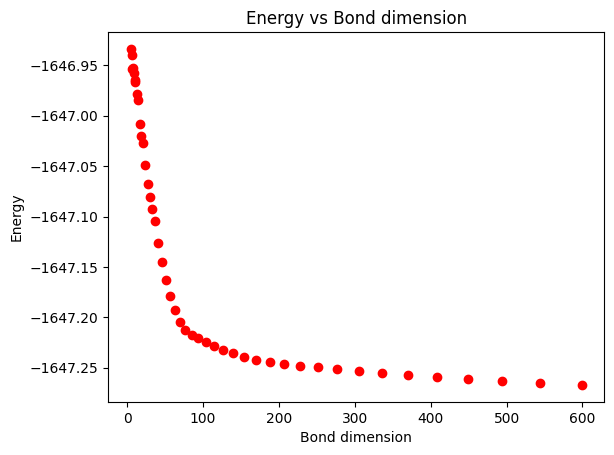

In [7]:
#Plot energy vs bond dimension,
plt.plot(sorted_bond_dimensions, sorted_dmrg_energies, 'ro')
plt.xlabel('Bond dimension')
plt.ylabel('Energy')
plt.title('Energy vs Bond dimension')
plt.show()

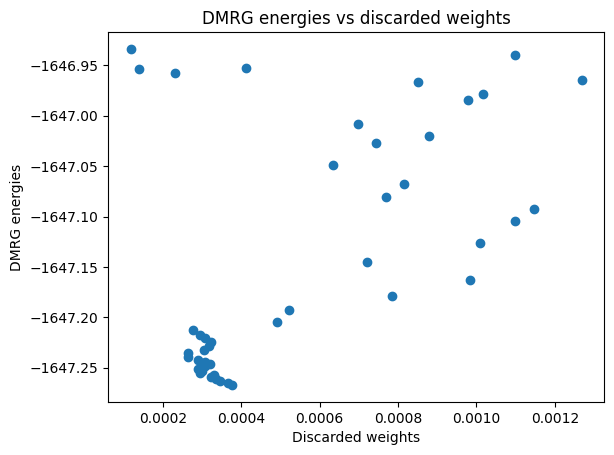

In [8]:
#Plot energy vs discarded weights
fig, ax = plt.subplots()
ax.plot(sorted_discarded_weights, sorted_dmrg_energies, 'o')
ax.set_xlabel('Discarded weights')
ax.set_ylabel('DMRG energies')
ax.set_title('DMRG energies vs discarded weights')
plt.show()

In [9]:
# num_keep = len(sorted_bond_dimensions)
# num_keep = 10


# num_keep_list = [3,4,5,6,7,8,9,10]
# num_keep_list = np.arange(3, len(sorted_bond_dimensions))
# num_keep_list = np.arange(3, 25)
fitting_dict_list = []
# for start_index in range(0, len(sorted_bond_dimensions)):
num_points = len(sorted_bond_dimensions)
small_r_squared_once = False
start_bond_dimension_list = []
est_energies_list = []
r_squared_list = []
# num_keep_list_final = []
intercept_stderr_list = []
slope_stderr_list = []
slope_list = []
last_index_list = []
last_bond_dimension_list = []
best_dmrg_energy_list = []
bd_intercept_list = []
bd_slope_list = []
bd_R_squared_list = []
bd_intercept_stderr_list = []
bd_slope_stderr_list = []
bd_extrapolated_bd_list = []
bd_max_bd_list = []
bd_min_bd_list = []
break_now = False
for start_index in range(num_points-4, 0, -1):
# for start_index in range(0, 10):
        if break_now:
            break
        # for last_index in range(start_index + 2, len(sorted_bond_dimensions)):
        last_index = num_points - 2
        kept_bond_dimensions = sorted_bond_dimensions[start_index : last_index + 1]
        kept_dmrg_energies = sorted_dmrg_energies[start_index : last_index + 1]
        kept_discarded_weights = sorted_discarded_weights[start_index : last_index + 1]

        # print("Number of kept bond dimensions:", len(kept_bond_dimensions))
        # print("Kept bond dimensions:", kept_bond_dimensions)
        # print("Kept DMRG energies:", kept_dmrg_energies)
        # print("Kept discarded weights:", kept_discarded_weights)

        # (result_obj, energy_estimated, fit_parameters, R_squared) = ee.dmrg_energy_extrapolation(
        #     energies_dmrg=kept_dmrg_energies,
        #     independent_vars=kept_discarded_weights,
        #     extrapolation_type= "discarded_weight",
        #     past_parameters = None,
        #     verbosity=2,
        # )
        slope, intercept, R_squared, slope_stderr, intercept_stderr = (
            ee.discarded_weight_linear_fitting(
                discarded_weights=kept_discarded_weights,
                dmrg_energies=kept_dmrg_energies,
            )
        )
        if slope < 0:
            print("Slope is negative. Skipping...")
            continue

        # If deviation of new point from fit line is too much, stop
        next_discarded_weight = sorted_discarded_weights[start_index-1]
        next_energy = sorted_dmrg_energies[start_index-1]
        predicted_energy = slope * next_discarded_weight + intercept
        # RMSE = np.sqrt(np.mean((kept_dmrg_energies - (slope * kept_discarded_weights + intercept))**2))
        # if np.abs((next_energy - predicted_energy)) > 10*RMSE:
        #     print(f"Relative Deviation of new point from fit line is {np.abs((next_energy - predicted_energy)) }, compared to 10*RMSE of {10*RMSE}. Stopping...")
        #     break_now = True
        stop_val = 0.001
        # stop_val = 0.01
        if np.abs((next_energy - predicted_energy)) > stop_val:
            print(f"Relative Deviation of new point from fit line is {np.abs((next_energy - predicted_energy)) } > {stop_val}. Stopping...")
            break_now = True
        # R_squared_threshold = 0.98
        # if np.round(R_squared, 2) < R_squared_threshold and small_r_squared_once:
        #     print(f"R squared: {R_squared} < {R_squared_threshold}. Stopping...")
        #     break
        # if np.round(R_squared, 2) < R_squared_threshold:
        #     print(f"R squared: {R_squared} < {R_squared_threshold}. Continuing...")
        #     small_r_squared_once = True

        energy_estimated = intercept
        
        # If any DMRG energy is less than the estimated energy, put dummy values
        if np.any(kept_dmrg_energies < energy_estimated):
            bd_slope = np.nan
            bd_intercept = np.nan
            bd_R_squared = np.nan
            bd_slope_stderr = np.nan
            bd_intercept_stderr = np.nan
            extrapolated_bd = np.nan
            max_bd = np.nan
            min_bd = np.nan
        else:
            small_r_squared_once_bd = True
            break_now_bd = False
            for start_index_bd in range(num_points-3, 0, -1):
                if break_now_bd:
                    break
                kept_bond_dimensions_bd = sorted_bond_dimensions[start_index_bd : -1]
                kept_dmrg_energies_bd = sorted_dmrg_energies[start_index_bd : -1]
                kept_discarded_weights_bd = sorted_discarded_weights[start_index_bd : -1]
                (
                    bd_slope,
                    bd_intercept,
                    bd_R_squared,
                    bd_slope_stderr,
                    bd_intercept_stderr,
                    extrapolated_bd,
                    max_bd,
                    min_bd,
                ) = ee.bond_dimension_fitting(
                    bond_dims=kept_bond_dimensions_bd,
                    dmrg_energies=kept_dmrg_energies_bd,
                    exact_energy=energy_estimated,
                    extrap_threshold=1e-3,
                )
                #If deviation of new point from fit line is too much, stop
                next_bd = sorted_bond_dimensions[start_index_bd-1]
                next_energy = sorted_dmrg_energies[start_index_bd-1]
                ln_next_bd = np.log(next_bd) ** 2
                deviation_energy_next_bd = next_energy - energy_estimated
                ln_deviation_energy_next_bd = np.log(deviation_energy_next_bd)
                # if np.abs(ln_deviation_energy_next_bd - (bd_slope * ln_next_bd + bd_intercept)) > 0.1:
                #     print("Deviation of new point from fit line is too much. Stopping...")
                #     break
                pred_val = bd_slope * ln_next_bd + bd_intercept
                if np.abs((ln_deviation_energy_next_bd - pred_val)/pred_val) > 0.03:#> 0.03:#> 0.01:
                    print("Deviation of new point from fit line is too much. Stopping...")
                    break_now_bd = True


                # R_squared_threshold_bd = 0.99725
                # if bd_R_squared < R_squared_threshold_bd and small_r_squared_once_bd:
                #     print(f"R squared BD: {bd_R_squared} < {R_squared_threshold_bd}. Stopping...")
                #     bd_slope = bd_slope_stored
                #     bd_intercept = bd_intercept_stored
                #     bd_R_squared = bd_R_squared_stored
                #     bd_slope_stderr = bd_slope_stderr_stored
                #     bd_intercept_stderr = bd_intercept_stderr_stored
                #     extrapolated_bd = extrapolated_bd_stored
                #     max_bd = max_bd_stored
                #     min_bd = min_bd_stored
                #     break
                # if bd_R_squared < R_squared_threshold_bd:
                #     print(f"R squared BD: {bd_R_squared} < {R_squared_threshold_bd}. Continuing...")
                #     small_r_squared_once_bd = True
                # bd_slope_stored = bd_slope
                # bd_intercept_stored = bd_intercept
                # bd_R_squared_stored = bd_R_squared
                # bd_slope_stderr_stored = bd_slope_stderr
                # bd_intercept_stderr_stored = bd_intercept_stderr
                # extrapolated_bd_stored = extrapolated_bd
                # max_bd_stored = max_bd
                # min_bd_stored = min_bd
        # print("Energy estimated:", energy_estimated)
        # print("DMRG Energy:", np.min(kept_dmrg_energies))
        # print("slope:", slope)
        # print("intercept:", intercept)
        # print("R squared:", R_squared)
        # print("1.96*Intercept stderr:", 1.96 * intercept_stderr)
        # print("BD slope:", bd_slope)
        # print("BD intercept:", bd_intercept)
        # print("BD R squared:", bd_R_squared)
        # print("1.96*BD intercept stderr:", 1.96 * bd_intercept_stderr)
        # print("Extrapolated bond dimension:", extrapolated_bd)
        # print("Max bond dimension:", max_bd)
        # print("Min bond dimension:", min_bd)

        est_energies_list.append(energy_estimated)
        r_squared_list.append(R_squared)
        # num_keep_list_final.append(num_keep)
        intercept_stderr_list.append(intercept_stderr)
        last_index_list.append(last_index)
        slope_stderr_list.append(slope_stderr)
        slope_list.append(slope)
        # last_bond_dimension_list.append(sorted_bond_dimensions[last_index])
        start_bond_dimension_list.append( sorted_bond_dimensions[start_index])
        best_dmrg_energy_list.append(np.min(kept_dmrg_energies))
        bd_intercept_list.append(bd_intercept)
        bd_slope_list.append(bd_slope)
        bd_R_squared_list.append(bd_R_squared)
        bd_intercept_stderr_list.append(bd_intercept_stderr)
        bd_slope_stderr_list.append(bd_slope_stderr)
        bd_extrapolated_bd_list.append(extrapolated_bd)
        bd_max_bd_list.append(max_bd)
        bd_min_bd_list.append(min_bd)

        if R_squared < 0.9:
            # print("R squared is less than 0.9. Skipping plotting...")
            continue
        # Plot
        plt.figure()
        # ln_weights = np.log(kept_discarded_weights)
        # rel_energy = (kept_dmrg_energies - energy_estimated)/energy_estimated
        # ln_abs_rel_energy = np.log(np.abs(rel_energy))
        # plt.plot(ln_weights, ln_abs_rel_energy, 'o', label=rf'Data, $E_{{est}}={energy_estimated:.4f}$, $E_{{DMRG}}= {np.min(kept_dmrg_energies):.4f}$')
        plt.plot(
            kept_discarded_weights,
            kept_dmrg_energies,
            "o",
            label=rf"Data, $E_{{est}}={energy_estimated:.4f}+/-{1.96*intercept_stderr:.4f} (95\% CI)$, $E_{{DMRG}}= {np.min(kept_dmrg_energies):.4f}$",
            color="g",
        )
        # Store x and y lims
        x_lim = plt.xlim()
        y_lim = plt.ylim()
        total_num_points = len(sorted_bond_dimensions)
        plt.plot(
            sorted_discarded_weights[total_num_points-20:],
            sorted_dmrg_energies[total_num_points-20:],
            "x",
            label="All data",
            color="b",
        )
        # ln ΔE_rel =a+b ln(δϵ)
        # alpha = fit_parameters[0]
        # a =np.log(alpha)
        # a = fit_parameters[0]
        # b = fit_parameters[1]

        # predicted_rel_energy = a + b * ln_weights
        # # print('alpha:', alpha)
        # print('a:', a)
        # print('b:', b)
        # print('Predicted relative energy:', predicted_rel_energy)
        # plt.plot(ln_weights, predicted_rel_energy, label=f'Fit, num_keep={num_keep}, $R^2={R_squared:.4f}$')
        plt.plot(
            sorted_discarded_weights[total_num_points-20:],
            slope * sorted_discarded_weights[total_num_points-20:] + intercept,
            label=f"Fit, BD: {int(sorted_bond_dimensions[start_index]):d}-{int(sorted_bond_dimensions[last_index]):d}, $R^2={R_squared:.4f}$",
            color="r",
        )
        # plt.xlim([np.min(sorted_discarded_weights)*0.9, np.max(kept_discarded_weights)*1.1])
        # plt.ylim([np.min(sorted_dmrg_energies)*1.001, np.max(sorted_dmrg_energies)*0.99999])
        # plt.xlim(np.min(sorted_discarded_weights)*0.9,x_lim[1])

        # plt.ylim(np.min(sorted_dmrg_energies)-0.001,y_lim[1])
        # plt.xlim(np.min(sorted_discarded_weights) * 0.9, 0.9e-4)
        # plt.ylim(np.min(sorted_dmrg_energies) - 0.001, -5413.03)

        # ee.plot_extrapolation(discarded_weights=kept_discarded_weights,
        #     energies_dmrg=kept_dmrg_energies,
        #     fit_parameters=fit_parameters,
        #     bond_dims=kept_bond_dimensions,
        #     plot_filename = None,
        #     figNum = 0,
        # )
        plt.title(
            f"Start index: {start_index}, Last index: {last_index}\nStart bond dimension: {int(sorted_bond_dimensions[start_index]):d}, Last bond dimension: {int(sorted_bond_dimensions[last_index]):d}"
        )
        plt.xlabel("δϵ")
        plt.ylabel("E")
        plt.legend(loc="upper left")

        # Plot BD fitting
        plt.figure()
        ln_bd_squared_kept = np.log(kept_bond_dimensions_bd) ** 2
        deviation_energy_kept = kept_dmrg_energies_bd - energy_estimated
        ln_deviation_energy_kept = np.log(deviation_energy_kept)
        plt.plot(
            ln_bd_squared_kept,
            ln_deviation_energy_kept,
            "o",
            label=rf"Data, $E_{{est}}={energy_estimated:.4f}$",
        )

        ln_bd_squared_sorted = np.log(sorted_bond_dimensions) ** 2
        deviation_energy_sorted = sorted_dmrg_energies - energy_estimated
        ln_deviation_energy_sorted = np.log(deviation_energy_sorted)
        plt.plot(
            ln_bd_squared_sorted,
            bd_slope * ln_bd_squared_sorted + bd_intercept,
            label=(
                rf"Fit, BD: {int(sorted_bond_dimensions[start_index]):d}-{int(sorted_bond_dimensions[last_index]):d}, $R^2={bd_R_squared:.4f}$"
                f"\n m:{bd_slope:.4f}+/-{1.96*bd_slope_stderr:.4f}95\%CI\n b:{bd_intercept:.4f}+/-{1.96*bd_intercept_stderr:.4f}95\%CI\n Extrapolated BD: {int(extrapolated_bd):d},[{int(min_bd):d},{int(max_bd):d}]"
            ),
            color="r",
        )
        plt.plot(
            ln_bd_squared_sorted,
            ln_deviation_energy_sorted,
            "x",
            label="All data",
            color="b",
        )

        plt.title(
            f"Start index: {start_index}, Last index: {last_index}\nStart bond dimension: {int(sorted_bond_dimensions[start_index]):d}, Last bond dimension: {int(sorted_bond_dimensions[last_index]):d}"
        )
        plt.xlabel(r"$[\ln(\text{D})]^2$")
        plt.ylabel(r"$\ln(E_{DMRG}-E_{est})$")
        plt.legend(loc="upper right")

        # fitting_dict_list.append(
        #     {
        #         "start_index": start_index,
        #         "start_bond_dimension": sorted_bond_dimensions[start_index],
        #         "last_bond_dimension_list": last_bond_dimension_list,
        #         "last_index_list": last_index_list,
        #         # "num_keep_list_final": num_keep_list_final,
        #         "est_energies_list": est_energies_list,
        #         "r_squared_list": r_squared_list,
        #         "intercept_stderr_list": intercept_stderr_list,
        #         "slope_list": slope_list,
        #         "slope_stderr_list": slope_stderr_list,
        #         "best_dmrg_energy_list": best_dmrg_energy_list,
        #         "bd_intercept_list": bd_intercept_list,
        #         "bd_slope_list": bd_slope_list,
        #         "bd_R_squared_list": bd_R_squared_list,
        #         "bd_intercept_stderr_list": bd_intercept_stderr_list,
        #         "bd_slope_stderr_list": bd_slope_stderr_list,
        #         "bd_extrapolated_bd_list": bd_extrapolated_bd_list,
        #         "bd_max_bd_list": bd_max_bd_list,
        #         "bd_min_bd_list": bd_min_bd_list,
        #     }
    # )
plt.show()

Slope is negative. Skipping...
Slope is negative. Skipping...
Slope is negative. Skipping...
Slope is negative. Skipping...
Slope is negative. Skipping...
Slope is negative. Skipping...
Slope is negative. Skipping...
Slope is negative. Skipping...
Slope is negative. Skipping...
Slope is negative. Skipping...
Slope is negative. Skipping...
Slope is negative. Skipping...
Slope is negative. Skipping...
Slope is negative. Skipping...
Slope is negative. Skipping...
Slope is negative. Skipping...
Slope is negative. Skipping...
Slope is negative. Skipping...
Slope is negative. Skipping...
Relative Deviation of new point from fit line is 0.03604216095072843 > 0.001. Stopping...


[nan]
[[nan]
 [nan]]


<Figure size 640x480 with 0 Axes>

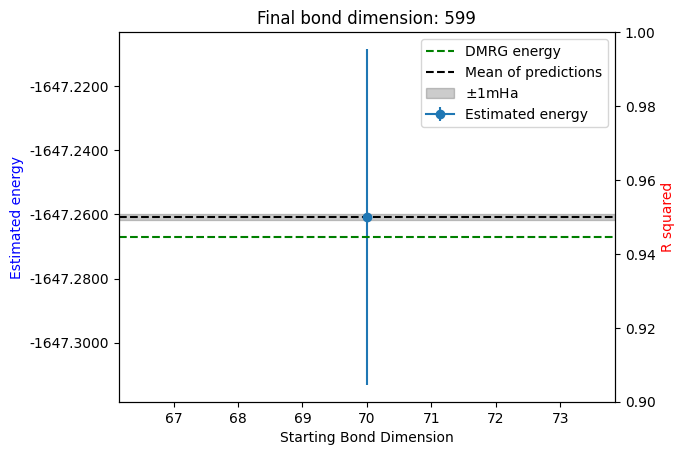

<Figure size 640x480 with 0 Axes>

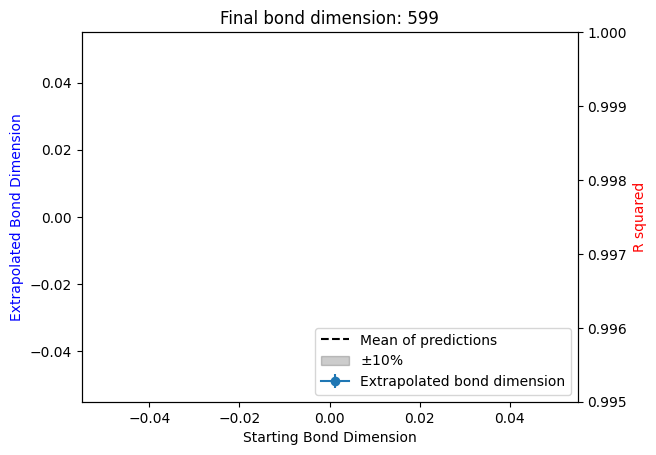

In [10]:
# for extrap_data_dict in fitting_dict_list:
#     start_index = extrap_data_dict["start_index"]
#     start_bond_dimension = extrap_data_dict["start_bond_dimension"]
#     last_bond_dimension_list = extrap_data_dict["last_bond_dimension_list"]
#     last_index_list = extrap_data_dict["last_index_list"]
#     # num_keep_list_final = extrap_data_dict["num_keep_list_final"]
#     est_energies_list = extrap_data_dict["est_energies_list"]
#     r_squared_list = extrap_data_dict["r_squared_list"]
#     intercept_stderr_list = extrap_data_dict["intercept_stderr_list"]
#     slope_list = extrap_data_dict["slope_list"]
#     slope_stderr_list = extrap_data_dict["slope_stderr_list"]
#     best_dmrg_energy_list = extrap_data_dict["best_dmrg_energy_list"]
#     bd_intercept_list = extrap_data_dict["bd_intercept_list"]
#     bd_slope_list = extrap_data_dict["bd_slope_list"]
#     bd_R_squared_list = extrap_data_dict["bd_R_squared_list"]
#     bd_intercept_stderr_list = extrap_data_dict["bd_intercept_stderr_list"]
#     bd_slope_stderr_list = extrap_data_dict["bd_slope_stderr_list"]
#     bd_extrapolated_bd_list = extrap_data_dict["bd_extrapolated_bd_list"]
#     bd_max_bd_list = extrap_data_dict["bd_max_bd_list"]
#     bd_min_bd_list = extrap_data_dict["bd_min_bd_list"]
# Plot est energies and r squared on same plot with num keep as x axis and two different y axes
plt.figure()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.errorbar(start_bond_dimension_list, est_energies_list, yerr=1.96*np.array(intercept_stderr_list), marker='o', linestyle='-', label='Estimated energy')
ax2.plot(start_bond_dimension_list, r_squared_list, 'x-', label='R squared', color='r')
ax1.set_xlabel('Starting Bond Dimension')
ax1.set_ylabel('Estimated energy', color='b')
ax2.set_ylabel('R squared', color='r')
ax2.set_ylim([0.9,1])
# ax1.text(0.9, 0.9, f'95% CI: +/-{1.96*intercept_stderr*1000:.3f} mHa', horizontalalignment='right', verticalalignment='center', transform=ax1.transAxes)
# Format ax1 to have four decimal places in labels with no shift value
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.4f}'.format(x)))
# Add DMRG energy
ax1.axhline(y=np.min(dmrg_energies), color='g', linestyle='--', label='DMRG energy')
#Add mean of predictions plus +/- 1mHa bounds
ax1.axhline(y=np.mean(est_energies_list), color='k', linestyle='--', label='Mean of predictions')
x_lim_store = plt.xlim()
ax1.fill_between(plt.xlim(), np.mean(est_energies_list)-1e-3, np.mean(est_energies_list)+1e-3, color='k', alpha=0.2,label=r"$\pm1$mHa")
plt.xlim(x_lim_store)
# ax1.axhline(y=np.mean(est_energies_list)+1e-3, color='r', linestyle='--', label='Mean of predictions +/- 1mHa')
# ax1.axhline(y=np.mean(est_energies_list)-1e-3, color='r', linestyle='--')
# plt.title(
#     f"Start index: {start_index}, Start bond dimension: {start_bond_dimension}"
# )
plt.title(
    f"Final bond dimension: {int(sorted_bond_dimensions[-1]):d}"
)
# Add legend
ax1.legend()

# Plot BD extrapolation
plt.figure()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
upper_error = np.array(bd_max_bd_list) - np.array(bd_extrapolated_bd_list)
lower_error = np.array(bd_extrapolated_bd_list) - np.array(bd_min_bd_list)
ax1.errorbar(start_bond_dimension_list, bd_extrapolated_bd_list, yerr=np.vstack([lower_error,upper_error]), marker='o', linestyle='-', label='Extrapolated bond dimension')
ax2.plot(start_bond_dimension_list, bd_R_squared_list, 'x-', label='R squared', color='r')
ax1.set_xlabel('Starting Bond Dimension')
ax1.set_ylabel('Extrapolated Bond Dimension', color='b')
ax2.set_ylabel('R squared', color='r')
ax2.set_ylim([0.995,1])
# Add mean of predictions plus +/- 10% bounds
ax1.axhline(y=np.mean(bd_extrapolated_bd_list), color='k', linestyle='--', label='Mean of predictions')
x_lim_store = plt.xlim()
ax1.fill_between(plt.xlim(), np.mean(bd_extrapolated_bd_list)-0.1*np.mean(bd_extrapolated_bd_list), np.mean(bd_extrapolated_bd_list)+0.1*np.mean(bd_extrapolated_bd_list), color='k', alpha=0.2,label=r"$\pm10\%$")
plt.xlim(x_lim_store)
# ax1.text(0.9, 0.9, f'95% CI: +/-{1.96*intercept_stderr*1000:.3f} mHa', horizontalalignment='right', verticalalignment='center', transform=ax1.transAxes)
# Format ax1 to have four decimal places in labels with no shift value
# ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.4f}'.format(x)))
# Add DMRG energy
# ax1.axhline(y=np.min(dmrg_energies), color='g', linestyle='--', label='DMRG energy')
# plt.title(
#     f"Start index: {start_index}, Start bond dimension: {start_bond_dimension}"
# )
plt.title(
    f"Final bond dimension: {int(sorted_bond_dimensions[-1]):d}"
)
# Add legend
ax1.legend(loc='lower right')
print(bd_extrapolated_bd_list)
print(np.vstack([bd_min_bd_list,bd_max_bd_list]))

In [11]:
point_index = 2
print(f"Start bond dimension: {start_bond_dimension_list[point_index]}")
print(f"Estimated energy: {est_energies_list[point_index]}")
print(f"R squared: {r_squared_list[point_index]}")
print(f"95% CI: +/-{1.96*intercept_stderr_list[point_index]:.5f}")
print(f"Extrapolated BD: {np.round(bd_extrapolated_bd_list[point_index])}")
print(f"BD R squared: {bd_R_squared_list[point_index]}")
print(f"BD Interval: [{np.round(bd_min_bd_list[point_index])},{np.round(bd_max_bd_list[point_index])}]")
print(f"BD Interval, percentage: [{100*(bd_min_bd_list[point_index]/bd_extrapolated_bd_list[point_index]-1):.2f}%,{100*(bd_max_bd_list[point_index]/bd_extrapolated_bd_list[point_index]-1):.2f}%]")


IndexError: list index out of range

In [ ]:
point_index = 4
print(f"Start bond dimension: {start_bond_dimension_list[point_index]}")
print(f"Estimated energy: {est_energies_list[point_index]}")
print(f"R squared: {r_squared_list[point_index]}")
print(f"95% CI: +/-{1.96*intercept_stderr_list[point_index]:.5f}")
print(f"Extrapolated BD: {np.round(bd_extrapolated_bd_list[point_index])}")
print(f"BD R squared: {bd_R_squared_list[point_index]}")
print(f"BD Interval: [{np.round(bd_min_bd_list[point_index])},{np.round(bd_max_bd_list[point_index])}]")
print(f"BD Interval, percentage: [{100*(bd_min_bd_list[point_index]/bd_extrapolated_bd_list[point_index]-1):.2f}%,{100*(bd_max_bd_list[point_index]/bd_extrapolated_bd_list[point_index]-1):.2f}%]")


In [ ]:
# # num_keep = len(sorted_bond_dimensions)
# # num_keep = 10


# # num_keep_list = [3,4,5,6,7,8,9,10]
# num_keep_list = np.arange(3, len(sorted_bond_dimensions))
# est_energies_list = []
# r_squared_list = []
# num_keep_list_final = []
# for num_keep in num_keep_list:
#     kept_bond_dimensions = sorted_bond_dimensions[-num_keep:]
#     kept_dmrg_energies = sorted_dmrg_energies[-num_keep:]
#     kept_discarded_weights = sorted_discarded_weights[-num_keep:]

#     print('Number of kept bond dimensions:', num_keep)
#     print('Kept bond dimensions:', kept_bond_dimensions)
#     print('Kept DMRG energies:', kept_dmrg_energies)
#     print('Kept discarded weights:', kept_discarded_weights)

#     (result_obj, energy_estimated, fit_parameters, R_squared) = ee.dmrg_energy_extrapolation(
#         energies_dmrg=kept_dmrg_energies,
#         independent_vars=kept_discarded_weights,
#         extrapolation_type= "discarded_weight",
#         past_parameters = None,
#         verbosity=2,
#     )
#     if R_squared < 0.9:
#         print('R squared is less than 0.9. Skipping...')
#         continue

#     print('Energy estimated:', energy_estimated)
#     print('DMRG Energy:', np.min(kept_dmrg_energies))
#     print('Fit parameters:', fit_parameters)
#     print('R squared:', R_squared)

#     est_energies_list.append(energy_estimated)
#     r_squared_list.append(R_squared)
#     num_keep_list_final.append(num_keep)

#     # Plot
#     plt.figure()
#     ln_weights = np.log(kept_discarded_weights)
#     rel_energy = (kept_dmrg_energies - energy_estimated)/energy_estimated
#     ln_abs_rel_energy = np.log(np.abs(rel_energy))
#     plt.plot(ln_weights, ln_abs_rel_energy, 'o', label=rf'Data, $E_{{est}}={energy_estimated:.4f}$, $E_{{DMRG}}= {np.min(kept_dmrg_energies):.4f}$')
#     # ln ΔE_rel =a+b ln(δϵ)
#     # alpha = fit_parameters[0]
#     # a =np.log(alpha)
#     a = fit_parameters[0]
#     b = fit_parameters[1]

#     predicted_rel_energy = a + b * ln_weights
#     # print('alpha:', alpha)
#     print('a:', a)
#     print('b:', b)
#     print('Predicted relative energy:', predicted_rel_energy)
#     plt.plot(ln_weights, predicted_rel_energy, label=f'Fit, num_keep={num_keep}, $R^2={R_squared:.4f}$')

#     # ee.plot_extrapolation(discarded_weights=kept_discarded_weights,
#     #     energies_dmrg=kept_dmrg_energies,
#     #     fit_parameters=fit_parameters,
#     #     bond_dims=kept_bond_dimensions,
#     #     plot_filename = None,
#     #     figNum = 0,
#     # )
#     plt.xlabel('ln(δϵ)')
#     plt.ylabel('ln(ΔE_rel)')
#     plt.legend()
# plt.show()



In [ ]:
# # Plot est energies and r squared on same plot with num keep as x axis and two different y axes
# plt.figure()
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# ax1.plot(num_keep_list_final, est_energies_list, 'o-', label='Estimated energy')
# ax2.plot(num_keep_list_final, r_squared_list, 'x-', label='R squared', color='r')
# ax1.set_xlabel('Number of kept data points')
# ax1.set_ylabel('Estimated energy', color='b')
# ax2.set_ylabel('R squared', color='r')
# # Format ax1 to have four decimal places in labels with no shift value
# ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.4f}'.format(x)))
# # Add DMRG energy
# ax1.axhline(y=np.min(dmrg_energies), color='g', linestyle='--', label='DMRG energy')
# # Add legend
# ax1.legend()
# plt.show()



In [ ]:
# # num_keep = len(sorted_bond_dimensions)
# # num_keep = 10


# # num_keep_list = [3,4,5,6,7,8,9,10]
# # num_keep_list = np.arange(3, len(sorted_bond_dimensions))
# num_keep_list = np.arange(3, 25)
# est_energies_list = []
# r_squared_list = []
# num_keep_list_final = []
# intercept_stderr_list=[]
# for num_keep in num_keep_list:
#     kept_bond_dimensions = sorted_bond_dimensions[-num_keep:]
#     kept_dmrg_energies = sorted_dmrg_energies[-num_keep:]
#     kept_discarded_weights = sorted_discarded_weights[-num_keep:]

#     print("Number of kept bond dimensions:", num_keep)
#     print("Kept bond dimensions:", kept_bond_dimensions)
#     print("Kept DMRG energies:", kept_dmrg_energies)
#     print("Kept discarded weights:", kept_discarded_weights)

#     # (result_obj, energy_estimated, fit_parameters, R_squared) = ee.dmrg_energy_extrapolation(
#     #     energies_dmrg=kept_dmrg_energies,
#     #     independent_vars=kept_discarded_weights,
#     #     extrapolation_type= "discarded_weight",
#     #     past_parameters = None,
#     #     verbosity=2,
#     # )
#     slope, intercept, R_squared, slope_stderr, intercept_stderr = (
#         ee.discarded_weight_linear_fitting(
#             discarded_weights=kept_discarded_weights, dmrg_energies=kept_dmrg_energies
#         )
#     )

#     energy_estimated = intercept

#     if R_squared < 0.9:
#         print("R squared is less than 0.9. Skipping...")
#         continue
#     print("Energy estimated:", energy_estimated)
#     print("DMRG Energy:", np.min(kept_dmrg_energies))
#     print("slope:", slope)
#     print("intercept:", intercept)
#     print("R squared:", R_squared)

#     est_energies_list.append(energy_estimated)
#     r_squared_list.append(R_squared)
#     num_keep_list_final.append(num_keep)
#     intercept_stderr_list.append(intercept_stderr)
#     # Plot
#     plt.figure()
#     # ln_weights = np.log(kept_discarded_weights)
#     # rel_energy = (kept_dmrg_energies - energy_estimated)/energy_estimated
#     # ln_abs_rel_energy = np.log(np.abs(rel_energy))
#     # plt.plot(ln_weights, ln_abs_rel_energy, 'o', label=rf'Data, $E_{{est}}={energy_estimated:.4f}$, $E_{{DMRG}}= {np.min(kept_dmrg_energies):.4f}$')
#     plt.plot(
#         kept_discarded_weights,
#         kept_dmrg_energies,
#         "o",
#         label=rf"Data, $E_{{est}}={energy_estimated:.4f}$, $E_{{DMRG}}= {np.min(kept_dmrg_energies):.4f}$",
#     )
#     # ln ΔE_rel =a+b ln(δϵ)
#     # alpha = fit_parameters[0]
#     # a =np.log(alpha)
#     # a = fit_parameters[0]
#     # b = fit_parameters[1]

#     # predicted_rel_energy = a + b * ln_weights
#     # # print('alpha:', alpha)
#     # print('a:', a)
#     # print('b:', b)
#     # print('Predicted relative energy:', predicted_rel_energy)
#     # plt.plot(ln_weights, predicted_rel_energy, label=f'Fit, num_keep={num_keep}, $R^2={R_squared:.4f}$')
#     plt.plot(
#         kept_discarded_weights,
#         slope * kept_discarded_weights + intercept,
#         label=f"Fit, num_keep={num_keep}, $R^2={R_squared:.4f}$",
#     )

#     # ee.plot_extrapolation(discarded_weights=kept_discarded_weights,
#     #     energies_dmrg=kept_dmrg_energies,
#     #     fit_parameters=fit_parameters,
#     #     bond_dims=kept_bond_dimensions,
#     #     plot_filename = None,
#     #     figNum = 0,
#     # )
#     plt.xlabel("δϵ")
#     plt.ylabel("E")
#     plt.legend()
# plt.show()

In [ ]:
# # Plot est energies and r squared on same plot with num keep as x axis and two different y axes
# plt.figure()
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# ax1.errorbar(num_keep_list_final, est_energies_list, yerr=1.96*np.array(intercept_stderr_list), marker='o', linestyle='-', label='Estimated energy')
# ax2.plot(num_keep_list_final, r_squared_list, 'x-', label='R squared', color='r')
# ax1.set_xlabel('Number of kept data points')
# ax1.set_ylabel('Estimated energy', color='b')
# ax2.set_ylabel('R squared', color='r')
# # ax1.text(0.9, 0.9, f'95% CI: +/-{1.96*intercept_stderr*1000:.3f} mHa', horizontalalignment='right', verticalalignment='center', transform=ax1.transAxes)
# # Format ax1 to have four decimal places in labels with no shift value
# ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.4f}'.format(x)))
# # Add DMRG energy
# ax1.axhline(y=np.min(dmrg_energies), color='g', linestyle='--', label='DMRG energy')
# # Add legend
# ax1.legend()
# plt.show()

In [ ]:
# # num_keep = len(sorted_bond_dimensions)
# # num_keep = 10


# # num_keep_list = [3,4,5,6,7,8,9,10]
# # num_keep_list = np.arange(3, len(sorted_bond_dimensions))
# # num_keep_list = np.arange(3, 25)
# fitting_dict_list = []
# # for start_index in range(0, len(sorted_bond_dimensions)):
# num_points = len(sorted_bond_dimensions)
# for start_index in range(num_points - 11, num_points-9):
# # for start_index in range(0, 10):
#     est_energies_list = []
#     r_squared_list = []
#     # num_keep_list_final = []
#     intercept_stderr_list = []
#     slope_stderr_list = []
#     slope_list = []
#     last_index_list = []
#     last_bond_dimension_list = []
#     best_dmrg_energy_list = []
#     bd_intercept_list = []
#     bd_slope_list = []
#     bd_R_squared_list = []
#     bd_intercept_stderr_list = []
#     bd_slope_stderr_list = []
#     bd_extrapolated_bd_list = []
#     bd_max_bd_list = []
#     bd_min_bd_list = []
#     for last_index in range(start_index + 2, len(sorted_bond_dimensions)):
#         kept_bond_dimensions = sorted_bond_dimensions[start_index : last_index + 1]
#         kept_dmrg_energies = sorted_dmrg_energies[start_index : last_index + 1]
#         kept_discarded_weights = sorted_discarded_weights[start_index : last_index + 1]

#         # print("Number of kept bond dimensions:", len(kept_bond_dimensions))
#         # print("Kept bond dimensions:", kept_bond_dimensions)
#         # print("Kept DMRG energies:", kept_dmrg_energies)
#         # print("Kept discarded weights:", kept_discarded_weights)

#         # (result_obj, energy_estimated, fit_parameters, R_squared) = ee.dmrg_energy_extrapolation(
#         #     energies_dmrg=kept_dmrg_energies,
#         #     independent_vars=kept_discarded_weights,
#         #     extrapolation_type= "discarded_weight",
#         #     past_parameters = None,
#         #     verbosity=2,
#         # )
#         slope, intercept, R_squared, slope_stderr, intercept_stderr = (
#             ee.discarded_weight_linear_fitting(
#                 discarded_weights=kept_discarded_weights,
#                 dmrg_energies=kept_dmrg_energies,
#             )
#         )
#         if slope < 0:
#             print("Slope is negative. Skipping...")
#             continue

#         energy_estimated = intercept
#         # If any DMRG energy is less than the estimated energy, put dummy values
#         if np.any(kept_dmrg_energies < energy_estimated):
#             bd_slope = np.nan
#             bd_intercept = np.nan
#             bd_R_squared = np.nan
#             bd_slope_stderr = np.nan
#             bd_intercept_stderr = np.nan
#             extrapolated_bd = np.nan
#             max_bd = np.nan
#             min_bd = np.nan
#         else:
#             (
#                 bd_slope,
#                 bd_intercept,
#                 bd_R_squared,
#                 bd_slope_stderr,
#                 bd_intercept_stderr,
#                 extrapolated_bd,
#                 max_bd,
#                 min_bd,
#             ) = ee.bond_dimension_fitting(
#                 bond_dims=kept_bond_dimensions,
#                 dmrg_energies=kept_dmrg_energies,
#                 exact_energy=energy_estimated,
#                 extrap_threshold=1e-3,
#             )
#         # print("Energy estimated:", energy_estimated)
#         # print("DMRG Energy:", np.min(kept_dmrg_energies))
#         # print("slope:", slope)
#         # print("intercept:", intercept)
#         # print("R squared:", R_squared)
#         # print("1.96*Intercept stderr:", 1.96 * intercept_stderr)
#         # print("BD slope:", bd_slope)
#         # print("BD intercept:", bd_intercept)
#         # print("BD R squared:", bd_R_squared)
#         # print("1.96*BD intercept stderr:", 1.96 * bd_intercept_stderr)
#         # print("Extrapolated bond dimension:", extrapolated_bd)
#         # print("Max bond dimension:", max_bd)
#         # print("Min bond dimension:", min_bd)

#         est_energies_list.append(energy_estimated)
#         r_squared_list.append(R_squared)
#         # num_keep_list_final.append(num_keep)
#         intercept_stderr_list.append(intercept_stderr)
#         last_index_list.append(last_index)
#         slope_stderr_list.append(slope_stderr)
#         slope_list.append(slope)
#         last_bond_dimension_list.append(sorted_bond_dimensions[last_index])
#         best_dmrg_energy_list.append(np.min(kept_dmrg_energies))
#         bd_intercept_list.append(bd_intercept)
#         bd_slope_list.append(bd_slope)
#         bd_R_squared_list.append(bd_R_squared)
#         bd_intercept_stderr_list.append(bd_intercept_stderr)
#         bd_slope_stderr_list.append(bd_slope_stderr)
#         bd_extrapolated_bd_list.append(extrapolated_bd)
#         bd_max_bd_list.append(max_bd)
#         bd_min_bd_list.append(min_bd)

#         if R_squared < 0.9:
#             # print("R squared is less than 0.9. Skipping plotting...")
#             continue
#         # Plot
#         plt.figure()
#         # ln_weights = np.log(kept_discarded_weights)
#         # rel_energy = (kept_dmrg_energies - energy_estimated)/energy_estimated
#         # ln_abs_rel_energy = np.log(np.abs(rel_energy))
#         # plt.plot(ln_weights, ln_abs_rel_energy, 'o', label=rf'Data, $E_{{est}}={energy_estimated:.4f}$, $E_{{DMRG}}= {np.min(kept_dmrg_energies):.4f}$')
#         plt.plot(
#             kept_discarded_weights,
#             kept_dmrg_energies,
#             "o",
#             label=rf"Data, $E_{{est}}={energy_estimated:.4f}+/-{1.96*intercept_stderr:.4f} (95\% CI)$, $E_{{DMRG}}= {np.min(kept_dmrg_energies):.4f}$",
#             color="g",
#         )
#         # Store x and y lims
#         x_lim = plt.xlim()
#         y_lim = plt.ylim()
#         total_num_points = len(sorted_bond_dimensions)
#         plt.plot(
#             sorted_discarded_weights[total_num_points-20:],
#             sorted_dmrg_energies[total_num_points-20:],
#             "x",
#             label="All data",
#             color="b",
#         )
#         # ln ΔE_rel =a+b ln(δϵ)
#         # alpha = fit_parameters[0]
#         # a =np.log(alpha)
#         # a = fit_parameters[0]
#         # b = fit_parameters[1]

#         # predicted_rel_energy = a + b * ln_weights
#         # # print('alpha:', alpha)
#         # print('a:', a)
#         # print('b:', b)
#         # print('Predicted relative energy:', predicted_rel_energy)
#         # plt.plot(ln_weights, predicted_rel_energy, label=f'Fit, num_keep={num_keep}, $R^2={R_squared:.4f}$')
#         plt.plot(
#             sorted_discarded_weights[total_num_points-20:],
#             slope * sorted_discarded_weights[total_num_points-20:] + intercept,
#             label=f"Fit, BD: {int(sorted_bond_dimensions[start_index]):d}-{int(sorted_bond_dimensions[last_index]):d}, $R^2={R_squared:.4f}$",
#             color="r",
#         )
#         # plt.xlim([np.min(sorted_discarded_weights)*0.9, np.max(kept_discarded_weights)*1.1])
#         # plt.ylim([np.min(sorted_dmrg_energies)*1.001, np.max(sorted_dmrg_energies)*0.99999])
#         # plt.xlim(np.min(sorted_discarded_weights)*0.9,x_lim[1])

#         # plt.ylim(np.min(sorted_dmrg_energies)-0.001,y_lim[1])
#         # plt.xlim(np.min(sorted_discarded_weights) * 0.9, 0.9e-4)
#         # plt.ylim(np.min(sorted_dmrg_energies) - 0.001, -5413.03)

#         # ee.plot_extrapolation(discarded_weights=kept_discarded_weights,
#         #     energies_dmrg=kept_dmrg_energies,
#         #     fit_parameters=fit_parameters,
#         #     bond_dims=kept_bond_dimensions,
#         #     plot_filename = None,
#         #     figNum = 0,
#         # )
#         plt.title(
#             f"Start index: {start_index}, Last index: {last_index}\nStart bond dimension: {int(sorted_bond_dimensions[start_index]):d}, Last bond dimension: {int(sorted_bond_dimensions[last_index]):d}"
#         )
#         plt.xlabel("δϵ")
#         plt.ylabel("E")
#         plt.legend(loc="upper left")

#         # Plot BD fitting
#         plt.figure()
#         ln_bd_squared_kept = np.log(kept_bond_dimensions) ** 2
#         deviation_energy_kept = kept_dmrg_energies - energy_estimated
#         ln_deviation_energy_kept = np.log(deviation_energy_kept)
#         plt.plot(
#             ln_bd_squared_kept,
#             ln_deviation_energy_kept,
#             "o",
#             label=rf"Data, $E_{{est}}={energy_estimated:.4f}$",
#         )

#         ln_bd_squared_sorted = np.log(sorted_bond_dimensions) ** 2
#         deviation_energy_sorted = sorted_dmrg_energies - energy_estimated
#         ln_deviation_energy_sorted = np.log(deviation_energy_sorted)
#         plt.plot(
#             ln_bd_squared_sorted,
#             bd_slope * ln_bd_squared_sorted + bd_intercept,
#             label=(
#                 rf"Fit, BD: {int(sorted_bond_dimensions[start_index]):d}-{int(sorted_bond_dimensions[last_index]):d}, $R^2={bd_R_squared:.4f}$"
#                 f"\n m:{bd_slope:.4f}+/-{1.96*bd_slope_stderr:.4f}95\%CI\n b:{bd_intercept:.4f}+/-{1.96*bd_intercept_stderr:.4f}95\%CI\n Extrapolated BD: {int(extrapolated_bd):d},[{int(min_bd):d},{int(max_bd):d}]"
#             ),
#             color="r",
#         )
#         plt.plot(
#             ln_bd_squared_sorted,
#             ln_deviation_energy_sorted,
#             "x",
#             label="All data",
#             color="b",
#         )

#         plt.title(
#             f"Start index: {start_index}, Last index: {last_index}\nStart bond dimension: {int(sorted_bond_dimensions[start_index]):d}, Last bond dimension: {int(sorted_bond_dimensions[last_index]):d}"
#         )
#         plt.xlabel(r"$[\ln(\text{D})]^2$")
#         plt.ylabel(r"$\ln(E_{DMRG}-E_{est})$")
#         plt.legend(loc="upper right")

#     fitting_dict_list.append(
#         {
#             "start_index": start_index,
#             "start_bond_dimension": sorted_bond_dimensions[start_index],
#             "last_bond_dimension_list": last_bond_dimension_list,
#             "last_index_list": last_index_list,
#             # "num_keep_list_final": num_keep_list_final,
#             "est_energies_list": est_energies_list,
#             "r_squared_list": r_squared_list,
#             "intercept_stderr_list": intercept_stderr_list,
#             "slope_list": slope_list,
#             "slope_stderr_list": slope_stderr_list,
#             "best_dmrg_energy_list": best_dmrg_energy_list,
#             "bd_intercept_list": bd_intercept_list,
#             "bd_slope_list": bd_slope_list,
#             "bd_R_squared_list": bd_R_squared_list,
#             "bd_intercept_stderr_list": bd_intercept_stderr_list,
#             "bd_slope_stderr_list": bd_slope_stderr_list,
#             "bd_extrapolated_bd_list": bd_extrapolated_bd_list,
#             "bd_max_bd_list": bd_max_bd_list,
#             "bd_min_bd_list": bd_min_bd_list,
#         }
#     )
# plt.show()

In [ ]:
# for extrap_data_dict in fitting_dict_list:
#     start_index = extrap_data_dict["start_index"]
#     start_bond_dimension = extrap_data_dict["start_bond_dimension"]
#     last_bond_dimension_list = extrap_data_dict["last_bond_dimension_list"]
#     last_index_list = extrap_data_dict["last_index_list"]
#     # num_keep_list_final = extrap_data_dict["num_keep_list_final"]
#     est_energies_list = extrap_data_dict["est_energies_list"]
#     r_squared_list = extrap_data_dict["r_squared_list"]
#     intercept_stderr_list = extrap_data_dict["intercept_stderr_list"]
#     slope_list = extrap_data_dict["slope_list"]
#     slope_stderr_list = extrap_data_dict["slope_stderr_list"]
#     best_dmrg_energy_list = extrap_data_dict["best_dmrg_energy_list"]
#     bd_intercept_list = extrap_data_dict["bd_intercept_list"]
#     bd_slope_list = extrap_data_dict["bd_slope_list"]
#     bd_R_squared_list = extrap_data_dict["bd_R_squared_list"]
#     bd_intercept_stderr_list = extrap_data_dict["bd_intercept_stderr_list"]
#     bd_slope_stderr_list = extrap_data_dict["bd_slope_stderr_list"]
#     bd_extrapolated_bd_list = extrap_data_dict["bd_extrapolated_bd_list"]
#     bd_max_bd_list = extrap_data_dict["bd_max_bd_list"]
#     bd_min_bd_list = extrap_data_dict["bd_min_bd_list"]
#     # Plot est energies and r squared on same plot with num keep as x axis and two different y axes
#     plt.figure()
#     fig, ax1 = plt.subplots()
#     ax2 = ax1.twinx()
#     ax1.errorbar(last_bond_dimension_list, est_energies_list, yerr=1.96*np.array(intercept_stderr_list), marker='o', linestyle='-', label='Estimated energy')
#     ax2.plot(last_bond_dimension_list, r_squared_list, 'x-', label='R squared', color='r')
#     ax1.set_xlabel('Final Bond Dimension')
#     ax1.set_ylabel('Estimated energy', color='b')
#     ax2.set_ylabel('R squared', color='r')
#     ax2.set_ylim([0.99,1])
#     # ax1.text(0.9, 0.9, f'95% CI: +/-{1.96*intercept_stderr*1000:.3f} mHa', horizontalalignment='right', verticalalignment='center', transform=ax1.transAxes)
#     # Format ax1 to have four decimal places in labels with no shift value
#     ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.4f}'.format(x)))
#     # Add DMRG energy
#     ax1.axhline(y=np.min(dmrg_energies), color='g', linestyle='--', label='DMRG energy')
#     plt.title(
#         f"Start index: {start_index}, Start bond dimension: {start_bond_dimension}"
#     )
#     # Add legend
#     ax1.legend()

#     # Plot BD extrapolation
#     plt.figure()
#     fig, ax1 = plt.subplots()
#     ax2 = ax1.twinx()
#     upper_error = np.array(bd_max_bd_list) - np.array(bd_extrapolated_bd_list)
#     lower_error = np.array(bd_extrapolated_bd_list) - np.array(bd_min_bd_list)
#     ax1.errorbar(last_bond_dimension_list, bd_extrapolated_bd_list, yerr=np.vstack([lower_error,upper_error]), marker='o', linestyle='-', label='Extrapolated bond dimension')
#     ax2.plot(last_bond_dimension_list, bd_R_squared_list, 'x-', label='R squared', color='r')
#     ax1.set_xlabel('Final Bond Dimension')
#     ax1.set_ylabel('Extrapolated Bond Dimension', color='b')
#     ax2.set_ylabel('R squared', color='r')
#     ax2.set_ylim([0.99,1])
#     # ax1.text(0.9, 0.9, f'95% CI: +/-{1.96*intercept_stderr*1000:.3f} mHa', horizontalalignment='right', verticalalignment='center', transform=ax1.transAxes)
#     # Format ax1 to have four decimal places in labels with no shift value
#     # ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.4f}'.format(x)))
#     # Add DMRG energy
#     # ax1.axhline(y=np.min(dmrg_energies), color='g', linestyle='--', label='DMRG energy')
#     plt.title(
#         f"Start index: {start_index}, Start bond dimension: {start_bond_dimension}"
#     )
#     # Add legend
#     ax1.legend(loc='lower right')
#     print(bd_extrapolated_bd_list)
#     print(np.vstack([bd_min_bd_list,bd_max_bd_list]))

In [ ]:
# plt.plot(
#             sorted_discarded_weights,
#             sorted_dmrg_energies,
#             "x",
#             label="All data",
#             color="b",
#         )
# plt.xlim(4e-5, 1e-4)
# plt.ylim(-5412.04, -5412.02)